# Analyze efficient use of enzymes

In [1]:
import pandas
import os
import tqdm
import numpy
import json
import matplotlib.pyplot as plt
import seaborn as sns
pandas.set_option('display.max_colwidth', None)
plt.rcParams['svg.fonttype'] = 'none'

## Analyze

In [2]:
with open('names.json') as f:
    names = json.load(f)

### Load

In [3]:
results_dict = {}
directory = "./analysis/10steps/"
for file in os.listdir(directory):
    if ".csv" not in file: continue
    results_dict[file.split("_C_")[0]] = pandas.read_csv(directory + file,index_col=0)

results_dict = {names[k]:v for k,v in results_dict.items()}

In [4]:
sensitivity = {}
for org,df in results_dict.items():
    df = df.T
    tmp = df['mRNA_biomass_to_biomass']/df['protein_biomass_to_biomass']
#     tmp = tmp.fillna(0.)
    sensitivity[org] = tmp.to_dict()

In [5]:
sensitivity_df = pandas.DataFrame.from_dict(sensitivity).abs()
df = (sensitivity_df)
df = df.div(df.max())

### Trend

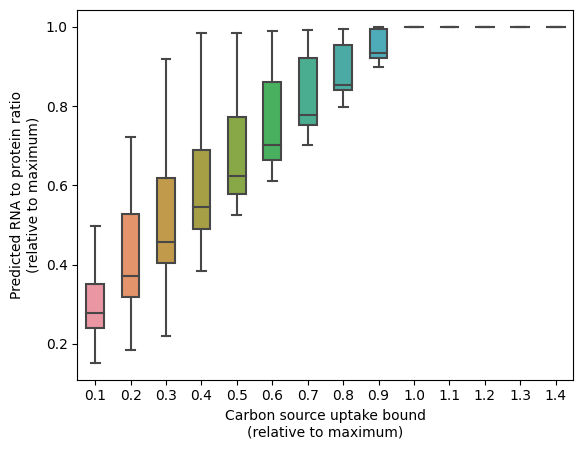

In [6]:
fig,ax = plt.subplots()

for pos,row in df.iterrows():
    Y = numpy.random.normal(0., 0.04, size = len(row.values))

sns.boxplot(data=df.T,ax=ax,width=0.5,showfliers=False)

ax.set_xlabel("Carbon source uptake bound\n(relative to maximum)")
ax.set_ylabel("Predicted RNA to protein ratio\n(relative to maximum)")
ax.set_xticklabels(["{:.1f}".format(i) for i in numpy.arange(0.1,1.5,0.1)])

plt.savefig("./figures/translational_efficiency.svg",format="SVG")